# Project: Bankruptcy Prevention

## Problem Statement

### Business Objective:
**This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.**

**The data file contains 7 features about 250 companies**

**The data set includes the following variables:**
- 1. industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
- 2. management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
- 3. financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
- 4. credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
- 5. competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
- 6. operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
- 7. class: bankruptcy, non-bankruptcy (target variable).

### Acceptance Criterion:
**Need to deploy the end results using Flask /Streamlit.etc.**

# Project or Model

#### **Importing the libraries needed for the Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import statsmodels.api as smf

#### **Importing Warnings** 

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### **Importing data**

In [3]:
df = pd.read_csv('Data-set.csv')

# EDA 

In [4]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [5]:
list(df.columns)

['industrial_risk',
 ' management_risk',
 ' financial_flexibility',
 ' credibility',
 ' competitiveness',
 ' operating_risk',
 ' class']

In [6]:
df.shape

(250, 7)

In [7]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [9]:
df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [10]:
df_1 = df.drop_duplicates()

In [11]:
df_1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [12]:
df_1.shape

(103, 7)

#### Renameing the columns 

#Some of the columns names are having unwanted spaces

In [13]:
list(df_1.columns.values)

['industrial_risk',
 ' management_risk',
 ' financial_flexibility',
 ' credibility',
 ' competitiveness',
 ' operating_risk',
 ' class']

In [14]:
df_1.columns = ['industrial_risk', 'management_risk','financial_flexibility', 'credibility','competitiveness', 'operating_risk', 'class']

In [15]:
list(df_1.columns.values)

['industrial_risk',
 'management_risk',
 'financial_flexibility',
 'credibility',
 'competitiveness',
 'operating_risk',
 'class']

### Data Visualization 

<AxesSubplot: xlabel='industrial_risk', ylabel='count'>

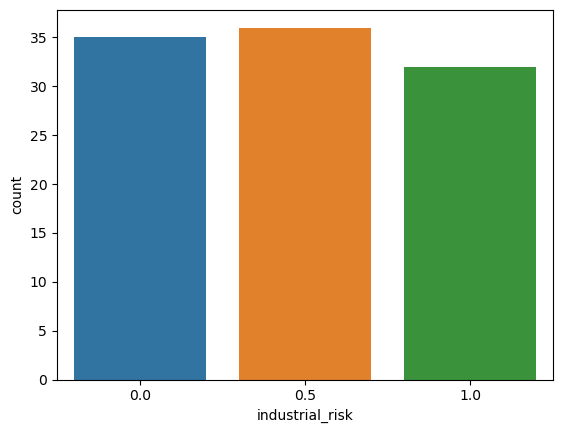

In [16]:
sns.countplot(x=df_1['industrial_risk'])

<AxesSubplot: xlabel='management_risk', ylabel='count'>

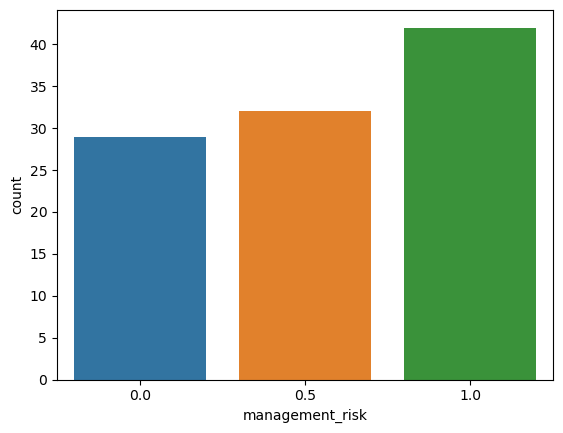

In [17]:
sns.countplot(x=df_1['management_risk'])

<AxesSubplot: xlabel='financial_flexibility', ylabel='count'>

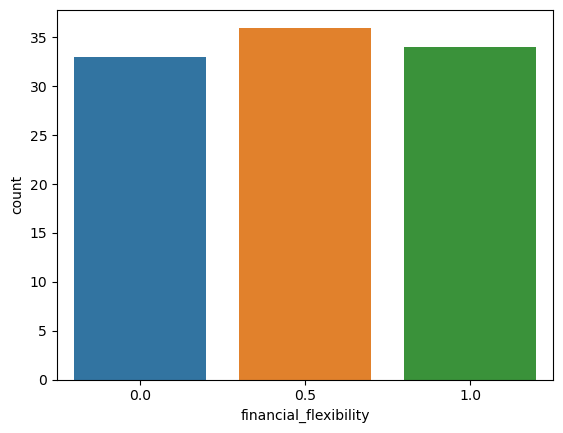

In [18]:
sns.countplot(x=df_1['financial_flexibility'])

<AxesSubplot: xlabel='credibility', ylabel='count'>

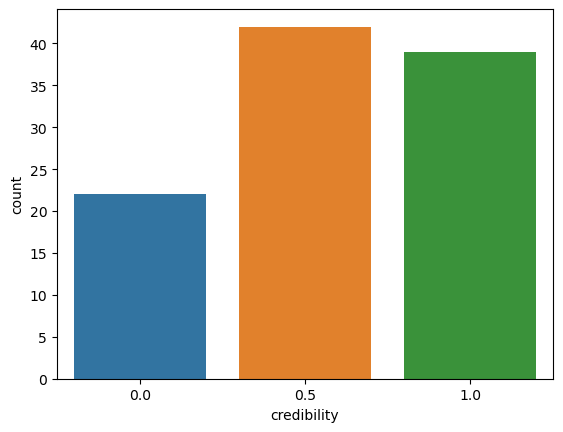

In [19]:
sns.countplot(x=df_1['credibility'])

<AxesSubplot: xlabel='competitiveness', ylabel='count'>

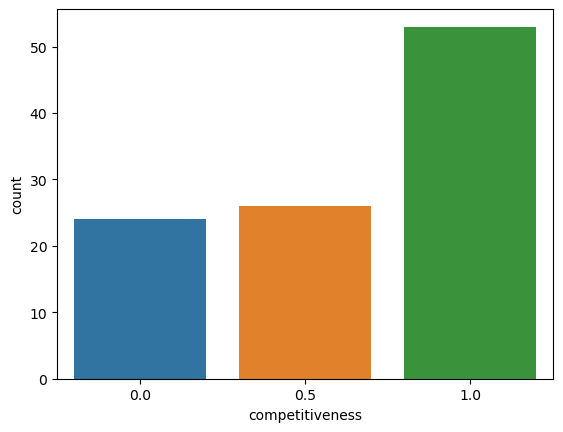

In [20]:
sns.countplot(x=df_1['competitiveness'])

<AxesSubplot: xlabel='operating_risk', ylabel='count'>

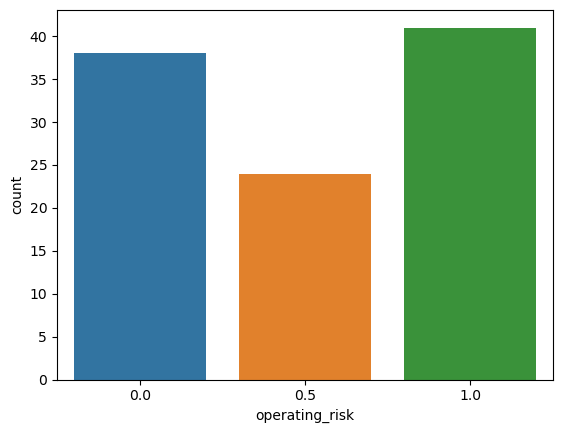

In [21]:
sns.countplot(x=df_1['operating_risk'])

<AxesSubplot: xlabel='class', ylabel='count'>

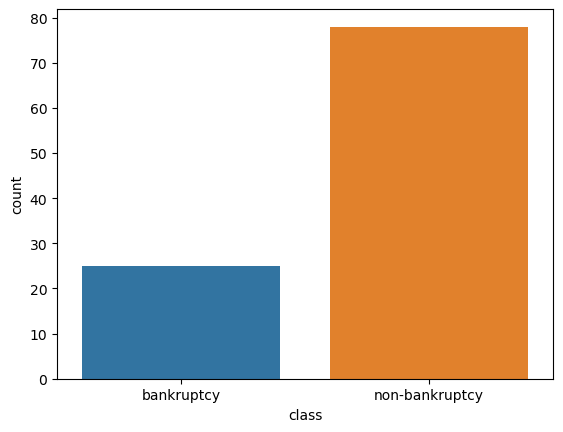

In [22]:
sns.countplot(x=df_1['class'])

#### Fequency distribution of the data

In [23]:
df_freq1 = df_1[['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk']].apply(pd.Series.value_counts)

df_freq1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0.0,35,29,33,22,24,38
0.5,36,32,36,42,26,24
1.0,32,42,34,39,53,41


In [24]:
df_freq1 = df_freq1.T
df_freq1

,0.0,0.5,1.0
industrial_risk,35,36,32
management_risk,29,32,42
financial_flexibility,33,36,34
credibility,22,42,39
competitiveness,24,26,53
operating_risk,38,24,41


<AxesSubplot: >

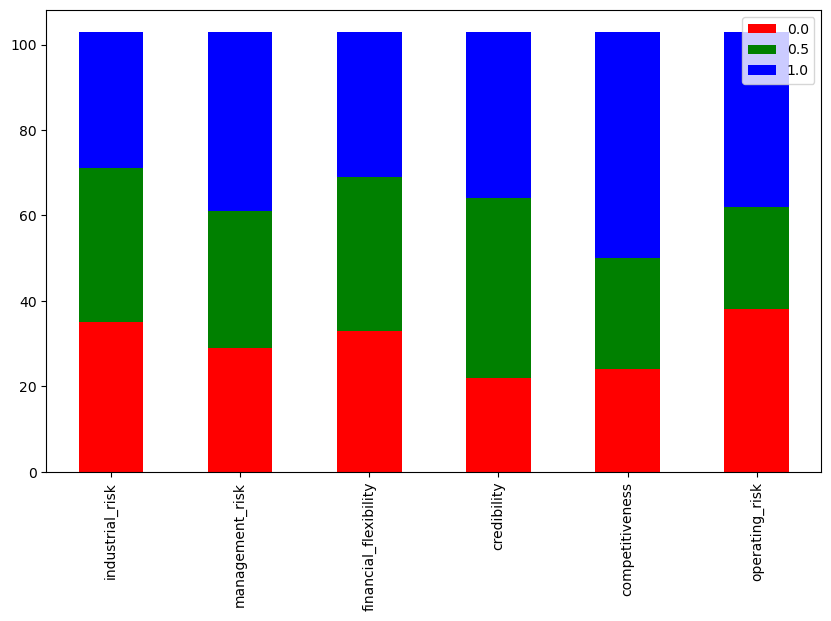

In [25]:
df_freq1.plot(kind='bar', stacked=True, color=['red', 'green', 'blue'], figsize=(10, 6))

In [26]:
df_freq2 = df_1[['class']].apply(pd.Series.value_counts)
df_freq2

,class
non-bankruptcy,78
bankruptcy,25


In [27]:
df_freq2 = df_freq2.T
df_freq2

,non-bankruptcy,bankruptcy
class,78,25


<AxesSubplot: >

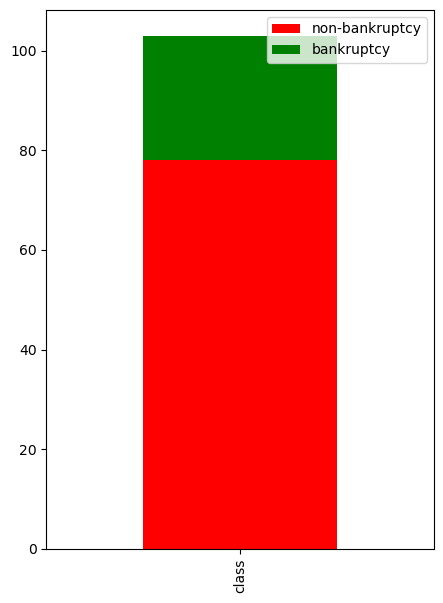

In [28]:
df_freq2.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(5,7))

In [29]:
df_1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


In [30]:
df_1_industrial_risk = df_1.value_counts(['industrial_risk', 'class'])
df_1_industrial_risk

industrial_risk  class         
0.5              non-bankruptcy    30
0.0              non-bankruptcy    29
1.0              non-bankruptcy    19
                 bankruptcy        13
0.0              bankruptcy         6
0.5              bankruptcy         6
dtype: int64

In [31]:
df_1_industrial_risk = df_1.value_counts(['industrial_risk', 'class'])
df_1_industrial_risk

industrial_risk  class         
0.5              non-bankruptcy    30
0.0              non-bankruptcy    29
1.0              non-bankruptcy    19
                 bankruptcy        13
0.0              bankruptcy         6
0.5              bankruptcy         6
dtype: int64

In [32]:
type(df_1_industrial_risk)

pandas.core.series.Series

In [33]:
df_1_industrial_risk.sort_values()

industrial_risk  class         
0.0              bankruptcy         6
0.5              bankruptcy         6
1.0              bankruptcy        13
                 non-bankruptcy    19
0.0              non-bankruptcy    29
0.5              non-bankruptcy    30
dtype: int64

In [34]:
df_1_industrial_risk = df_1_industrial_risk.sort_index()
df_1_industrial_risk

industrial_risk  class         
0.0              bankruptcy         6
                 non-bankruptcy    29
0.5              bankruptcy         6
                 non-bankruptcy    30
1.0              bankruptcy        13
                 non-bankruptcy    19
dtype: int64

In [35]:
type(df_1_industrial_risk)

pandas.core.series.Series

<AxesSubplot: xlabel='industrial_risk,class'>

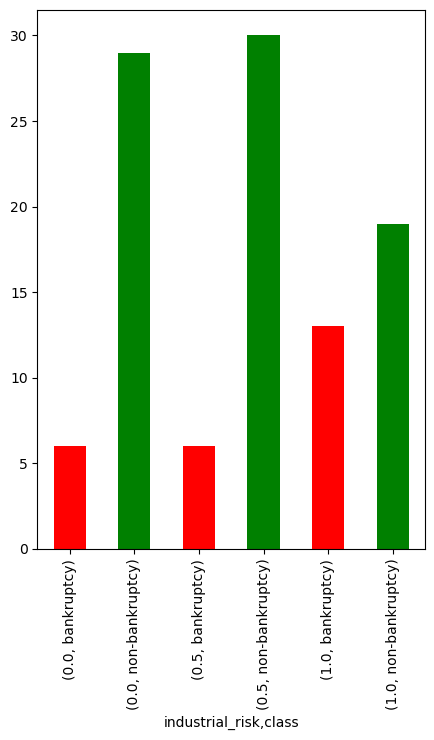

In [36]:
df_1_industrial_risk.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(5,7))

In [37]:
df_1_industrial_risk.info()

<class 'pandas.core.series.Series'>
MultiIndex: 6 entries, (0.0, 'bankruptcy') to (1.0, 'non-bankruptcy')
Series name: None
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 218.0+ bytes


In [38]:
df_1_industrial_risk_T = df_1_industrial_risk.T
df_1_industrial_risk_T

industrial_risk  class         
0.0              bankruptcy         6
                 non-bankruptcy    29
0.5              bankruptcy         6
                 non-bankruptcy    30
1.0              bankruptcy        13
                 non-bankruptcy    19
dtype: int64

In [39]:
type(df_1_industrial_risk)

pandas.core.series.Series

In [40]:
df_1.value_counts(['management_risk', 'class'])

management_risk  class         
1.0              non-bankruptcy    28
0.0              non-bankruptcy    25
0.5              non-bankruptcy    25
1.0              bankruptcy        14
0.5              bankruptcy         7
0.0              bankruptcy         4
dtype: int64

In [41]:
df_1.value_counts(['financial_flexibility', 'class'])

financial_flexibility  class         
0.5                    non-bankruptcy    35
1.0                    non-bankruptcy    33
0.0                    bankruptcy        23
                       non-bankruptcy    10
0.5                    bankruptcy         1
1.0                    bankruptcy         1
dtype: int64

In [42]:
df_1.value_counts(['credibility', 'class'])

credibility  class         
0.5          non-bankruptcy    37
1.0          non-bankruptcy    37
0.0          bankruptcy        18
0.5          bankruptcy         5
0.0          non-bankruptcy     4
1.0          bankruptcy         2
dtype: int64

In [43]:
df_1.value_counts(['competitiveness', 'class'])

competitiveness  class         
1.0              non-bankruptcy    53
0.5              non-bankruptcy    25
0.0              bankruptcy        24
0.5              bankruptcy         1
dtype: int64

In [44]:
df_1.value_counts(['operating_risk', 'class'])

operating_risk  class         
0.0             non-bankruptcy    31
1.0             non-bankruptcy    28
0.5             non-bankruptcy    19
1.0             bankruptcy        13
0.0             bankruptcy         7
0.5             bankruptcy         5
dtype: int64

In [45]:
df_1_new = df_1.iloc[:,:]
df_1_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


In [46]:
df_1_new["class_yn"] = 1
df_1_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy,1
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy,1
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy,1
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy,1


In [47]:
df_1_new.loc[df_1['class'] == 'bankruptcy', 'class_yn'] = 0
df_1_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy,1
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy,1
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy,1
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy,1


In [48]:
df_1_new.drop('class', inplace = True, axis =1)
df_1_new.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [49]:
np.shape(df_1_new)

(103, 7)

In [50]:
# Input
x = df_1_new.iloc[:,:-1]

# Target variable

y = df_1_new.iloc[:,-1]

In [51]:
from sklearn.model_selection import train_test_split # trian and test
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.metrics import classification_report

### Sliptting the data into train and test


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

# Preparing models

## 1. Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
logisticlassifier = LogisticRegression() 

In [54]:
logisticlassifier.fit(x_train, y_train)
logisticlassifier.coef_ # coefficients of features


array([[-0.27759343, -0.63289116,  1.7551711 ,  1.58288634,  2.54120046,
        -0.7172828 ]])

###  After the traing the model then we prediction on test data


In [55]:
y_pred = logisticlassifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1])

### let's test the performance of our model - confusion matrix


In [56]:
from sklearn.metrics import confusion_matrix
confusion_logist = confusion_matrix(y_test, y_pred)
confusion_logist

array([[ 6,  2],
       [ 0, 18]])

###  Accuracy of a Model

In [57]:
# Train Accuracy

train_acc_logist = np.mean(logisticlassifier.predict(x_train)== y_train)
train_acc_logist

1.0

In [58]:
# Test Accuracy

test_acc_logist = np.mean(logisticlassifier.predict(x_test)== y_test)
test_acc_logist

0.9230769230769231

In [59]:
from sklearn.metrics import accuracy_score

logistic_acc = accuracy_score(y_test, y_pred)
logistic_acc

0.9230769230769231

### Accuracy of overall model

In [60]:
logisticlassifier.fit(x, y)

logisticlassifier.coef_ # coefficients of features


array([[-0.63881508, -0.4126883 ,  1.77938368,  1.54288447,  3.15970296,
        -0.28736363]])

In [61]:
y_pred = logisticlassifier.predict(x)

confusion_matrix = confusion_matrix(y, y_pred)
confusion_matrix

array([[24,  1],
       [ 0, 78]])

In [62]:
acc = accuracy_score(y, y_pred)
acc

0.9902912621359223

In [63]:
logisticlassifier.score(x_test, y_test)

0.9615384615384616

In [64]:
logisticlassifier.score(x_train, y_train)

1.0

### From the accuracy we can say that the model is overfitted to avoid overfit problem we use Regularozation method
#### here we have L1, L2 regularization
##### It turns out they have different but equally useful properties. From a practical standpoint, L1 tends to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly. L1 is therefore useful for feature selection, as we can drop any variables associated with coefficients that go to zero.
#### L1 = lasso regularization

In [65]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 50, max_iter = 100, tol =0.1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [66]:
lasso_reg.score(x_test, y_test)

-0.03546129195479897

In [67]:
lasso_reg.score(x_train, y_train)

0.0

#### L2 = Ridge regularization 

In [68]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 50, max_iter = 100, tol = 0.1)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [69]:
ridge_reg.score(x_test, y_test)

0.359350321772427

In [70]:
ridge_reg.score(x_train, y_train)

0.4414172283208746

## 2. KNN model

In [71]:
from sklearn.neighbors import KNeighborsClassifier as KNC

### To choose k value 

In [72]:
import math
math.sqrt(len(y_test))

5.0990195135927845

Here we are choosing the k value to be  5 (choosing odd value)

Define the model KNN and fit model

In [73]:
KNN_classifier = KNC(n_neighbors =5, p = 2, metric = 'euclidean')

In [74]:
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

#### Predict the Test set results

In [75]:
y_pred = KNN_classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1])

#### Evaluate model

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 7  1]
 [ 0 18]]


In [77]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.972972972972973


#### Accuracy of KNN model


In [78]:
from sklearn.metrics import accuracy_score
KNN_acc = accuracy_score(y_test, y_pred)
KNN_acc

0.9615384615384616

## 3. Naive Bayes Classifier

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


#### Creating GaussianNB and MultinomialNB functions


In [80]:
GNB = GaussianNB()
MNB = MultinomialNB()

#### Building the model with GaussianNB


In [81]:
Naive_GNB = GNB.fit(x_train ,y_train)
y_pred = Naive_GNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1])

#### Evaluate Model

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 7  1]
 [ 0 18]]


#### Accuracy of GNB

In [83]:
from sklearn.metrics import accuracy_score
GNB_acc = accuracy_score(y_test , y_pred)
GNB_acc

0.9615384615384616

#### Building the model with MultinomialNB


In [84]:
Naive_MNB = MNB.fit(x_train ,y_train)
y_pred = Naive_MNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

#### Evaluating Model


In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 2  6]
 [ 0 18]]


#### Accuracy of MNB

In [86]:
from sklearn.metrics import accuracy_score
MNB_acc = accuracy_score(y_test , y_pred)
MNB_acc

0.7692307692307693

## 4. Support Vector Machine

In [87]:
from sklearn.svm import SVC


#### Kernel = Linear model

In [88]:
model_linear = SVC(kernel = 'linear')
model_linear.fit(x_train, y_train)
pred_test_linear = model_linear.predict(x_test)
np.mean(pred_test_linear==y_test)

0.9615384615384616

#### Kernel = ploy model

In [89]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
np.mean(pred_test_poly==y_test) # Accuracy

0.9615384615384616

#### Kernel = 'rbf' model --> Radial Basis Function 

In [90]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
np.mean(pred_test_rbf==y_test) # Accuracy

0.9615384615384616

## 5. DBSCAN 

In [91]:
df_1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,1
187,0.0,0.5,0.5,0.5,1.0,0.5,1
190,0.0,0.5,0.5,0.0,1.0,0.0,1
192,0.5,1.0,0.0,0.0,1.0,0.0,1


In [92]:
X= df_1.iloc[:,0:6]
Y = df_1.iloc[:,6]

In [93]:
df_1 = df_1.reset_index()

In [94]:
df_1

,index,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
98,185,0.0,0.5,0.0,0.5,1.0,0.5,1
99,187,0.0,0.5,0.5,0.5,1.0,0.5,1
100,190,0.0,0.5,0.5,0.0,1.0,0.0,1
101,192,0.5,1.0,0.0,0.0,1.0,0.0,1


In [95]:
df_1.drop('index', inplace=True, axis=1)

In [96]:
df_1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
98,0.0,0.5,0.0,0.5,1.0,0.5,1
99,0.0,0.5,0.5,0.5,1.0,0.5,1
100,0.0,0.5,0.5,0.0,1.0,0.0,1
101,0.5,1.0,0.0,0.0,1.0,0.0,1


In [97]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=3)
dbscan.fit(X)
y=dbscan.labels_
y=pd.DataFrame(y)
y.value_counts()

 0    102
-1      1
dtype: int64

In [98]:
c1 = pd.DataFrame(dbscan.labels_,columns=["clusters"])
clustered = pd.concat([df_1,c1],axis = 1)
clustered

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn,clusters
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...
98,0.0,0.5,0.0,0.5,1.0,0.5,1,0
99,0.0,0.5,0.5,0.5,1.0,0.5,1,0
100,0.0,0.5,0.5,0.0,1.0,0.0,1,0
101,0.5,1.0,0.0,0.0,1.0,0.0,1,0


In [99]:
noisedata = clustered[clustered['clusters']==-1]
print(noisedata)

    industrial_risk  management_risk  financial_flexibility  credibility  \
24              1.0              0.5                    1.0          0.5   

    competitiveness  operating_risk  class_yn  clusters  
24              0.0             0.0         0        -1  


In [100]:
df_2 = clustered[clustered['clusters']>=0]
df_2.shape

(102, 8)

## 6. Decision Tree Classifier 

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=(4)) 
dt.fit(x_train, y_train)
y_predtrain_dt = dt.predict(x_train) 
y_predtest_dt = dt.predict(x_test) 
print("Training Accuracy: ",accuracy_score(y_train,y_predtrain_dt).round(2))
print("Test Accuracy: ",accuracy_score(y_test,y_predtest_dt).round(2))

Training Accuracy:  1.0
Test Accuracy:  1.0


## 7. Bagging Classifier 

In [102]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=(dt),n_estimators=100,max_samples=0.7,max_features=0.7,random_state=4) 
bag.fit(x_train, y_train)
y_predtrain_bag = bag.predict(x_train) 
y_predtest_bag = bag.predict(x_test) 
print("Training Accuracy: ",accuracy_score(y_train,y_predtrain_bag).round(2))
print("Test Accuracy: ",accuracy_score(y_test,y_predtest_bag).round(2))

Training Accuracy:  1.0
Test Accuracy:  1.0


In [103]:
train_accuracy_bag = []
test_accuracy_bag= []
for i in range(1,500):
    bag = BaggingClassifier(base_estimator=(dt),n_estimators=10,max_samples=0.9,max_features=0.7,random_state=i) 
    bag.fit(x_train, y_train)
    y_predtrain_bag = bag.predict(x_train) 
    y_predtest_bag = bag.predict(x_test) 
    train_accuracy_bag.append(accuracy_score(y_train,y_predtrain_bag).round(2))
    test_accuracy_bag.append(accuracy_score(y_test,y_predtest_bag).round(2))
    
print("Train Accuracy",np.mean(train_accuracy_bag).round(2))
print("Test Accuracy",np.mean(test_accuracy_bag).round(2))

Train Accuracy 1.0
Test Accuracy 1.0


## 8. Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,max_samples=0.9,max_features=0.5,random_state=5,max_depth=(3)) 
RFC.fit(x_train, y_train)

y_pred_train = RFC.predict(x_train) 
y_pred_test = RFC.predict(x_test) 

print("Training accuracy: ",accuracy_score(y_train,y_pred_train).round(2))
print("Test accuracy: ",accuracy_score(y_test,y_pred_test).round(2))

Training accuracy:  1.0
Test accuracy:  1.0


In [105]:
train_accuracy_rf = []
test_accuracy_rf= []
for i in range(1,500):
    RFR = RandomForestClassifier(n_estimators=100,max_samples=0.9,max_features=0.5,random_state=5,max_depth=(3)) 
    RFR.fit(x_train, y_train)
    y_predtrain_rf = RFR.predict(x_train) 
    y_predtest_rf = RFR.predict(x_test) 
    train_accuracy_rf.append(accuracy_score(y_train,y_predtrain_rf).round(2))
    test_accuracy_rf.append(accuracy_score(y_test,y_predtest_rf).round(2))
    
print("Train Accuracy",np.mean(train_accuracy_rf).round(2))
print("Test Accuracy",np.mean(test_accuracy_rf).round(2))

Train Accuracy 1.0
Test Accuracy 1.0


In [106]:
import pickle
pickle_out = open("bag.pkl","wb")
pickle.dump(bag, pickle_out)
pickle_out.close()

In [109]:
from pickle import dump
dump([logisticlassifier,MNB,KNN_classifier,model_linear,dt,bag,RFC],
open('allmodels_1.sav','wb'))